# **An√°lisis Exploratorio de Datos**

## **1. Limpieza**

### **1.1. Importar Datos y librer√≠as**

In [ ]:

from sklearnex import patch_sklearn
patch_sklearn()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import math
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [ ]:
# Configuraci√≥n est√©tica opcional
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Cargar los datos
df = pd.read_csv("diabetic_data.csv")

### **1.2 An√°lisis**


En esta secci√≥n analizamos el dataset, su contenido, la presencia de valores faltantes y su tratamiento para preparar los datos para el an√°lisis posterior.

#### **1.2.1 Observaci√≥n de los Datos**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
# Mostrar todas las columnas al imprimir
pd.set_option('display.max_columns', None)

# Mostrar las primeras filas del DataFrame
df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                 1          ?  Pediatrics-Endocrinology                  41   
1                 3          ?                         ?                  59   
2                 2          ?                         ?                  11   
3                 2          ?                         ?                  44   
4                 1          ?                         ?                  51   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   

   number_inpatient  diag_1  diag_2 diag_3  number_diagnoses max_glu_serum  \
0                 0  250.83       ?      ?                 1           NaN   
1                 0     276  250.01    255                 9           NaN   
2                 1     648     250    V27                 6           NaN   
3                 0       8  250.43    403                 7           NaN   
4                 0     197     157    250                 5           NaN   

  A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride  \
0       NaN        No          No          No             No          No   
1       NaN        No          No          No             No          No   
2       NaN        No          No          No             No          No   
3       NaN        No          No          No             No          No   
4       NaN        No          No          No             No          No   

  acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone  \
0            No        No        No          No           No            No   
1            No        No        No          No           No            No   
2            No    Steady        No          No           No            No   
3            No        No        No          No           No            No   
4            No    Steady        No          No           No            No   

  acarbose miglitol troglitazone tolazamide examide citoglipton insulin  \
0       No       No           No         No      No          No      No   
1       No       No           No         No      No          No      Up   
2       No       No           No         No      No          No      No   
3       No       No           No         No      No          No      Up   
4       No       No           No         No      No          No  Steady   

  glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
0                  No                  No                       No   
1                  No                  No                       No   
2                  No                  No                       No   
3                  No                  No                       No   
4        

Al observar los datos, nos llam√≥ la atenci√≥n el caso particular de tres variables: ***diag_1***, ***diag_2*** y ***diag_3***. Estas variables contienen c√≥digos de diagn√≥stico en formato ICD-9, los cuales, en su forma actual ‚Äîprincipalmente n√∫meros enteros‚Äî resultan poco interpretables para un an√°lisis cl√≠nico o estad√≠stico directo.

No obstante, al revisar el art√≠culo de investigaci√≥n ***"Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records"***, identificamos una propuesta para agrupar estos c√≥digos en categor√≠as m√©dicas m√°s comprensibles (como enfermedades circulatorias, respiratorias, digestivas, etc.).

Por consiguiente, decidimos llevar a cabo esta transformaci√≥n, convirtiendo los c√≥digos ICD-9 en categor√≠as m√©dicas m√°s claras y relevantes para nuestro an√°lisis de reingresos hospitalarios.

In [ ]:
def map_icd9(code):
    if pd.isnull(code):
        return 'Desconocido'

    if code == '?':
        return '?'  # mantener el signo de interrogaci√≥n tal cual

    try:
        code_str = str(code)

        # Casos especiales tipo string
        if code_str.startswith('V') or code_str.startswith('E'):
            return 'Causas externas'

        code_float = float(code_str)

        if (390 <= code_float <= 459) or (code_float == 785):
            return 'Circulatorio'
        elif (460 <= code_float <= 519) or (code_float == 786):
            return 'Respiratorio'
        elif (520 <= code_float <= 579) or (code_float == 787):
            return 'Digestivo'
        elif 250 <= code_float < 251:  # solo el 250, incluye decimales
            return 'Diabetes'
        elif 800 <= code_float <= 999:
            return 'Herida'
        elif 710 <= code_float <= 739:
            return 'Musculoesquel√©tico'
        elif (580 <= code_float <= 629) or (code_float == 788):
            return 'Genitourinario'
        elif 140 <= code_float <= 239:
            return 'Neoplasmas'
        elif (780 <= code_float <= 784) or (790 <= code_float <= 799):
            return 'S√≠ntomas mal definidos'
        elif (240 <= code_float <= 279) and not (250 <= code_float < 251):
            return 'Endocrino y metabolismo (sin diabetes)'
        elif (680 <= code_float <= 709) or (code_float == 782):
            return 'Piel y tejido subcut√°neo'
        elif 1 <= code_float <= 139:
            return 'Infecciosas y parasitarias'
        elif 290 <= code_float <= 319:
            return 'Trastornos mentales'
        elif 280 <= code_float <= 289:
            return 'Sangre y √≥rganos hematopoy√©ticos'
        elif 320 <= code_float <= 359:
            return 'Sistema nervioso'
        elif 630 <= code_float <= 679:
            return 'Embarazo y puerperio'
        elif 360 <= code_float <= 389:
            return '√ìrganos de los sentidos'
        elif 740 <= code_float <= 759:
            return 'Anomal√≠as cong√©nitas'
        else:
            return 'Otro'

    except:
        return 'Otro'



In [ ]:
# Transformaci√≥n de las variables de diagnostico
df['diag_1'] = df['diag_1'].apply(map_icd9)
df['diag_2'] = df['diag_2'].apply(map_icd9)
df['diag_3'] = df['diag_3'].apply(map_icd9)

df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                 1          ?  Pediatrics-Endocrinology                  41   
1                 3          ?                         ?                  59   
2                 2          ?                         ?                  11   
3                 2          ?                         ?                  44   
4                 1          ?                         ?                  51   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   

   number_inpatient                                  diag_1      diag_2  \
0                 0                                Diabetes           ?   
1                 0  Endocrino y metabolismo (sin diabetes)    Diabetes   
2                 1                    Embarazo y puerperio    Diabetes   
3                 0              Infecciosas y parasitarias    Diabetes   
4                 0                              Neoplasmas  Neoplasmas   

                                   diag_3  number_diagnoses max_glu_serum  \
0                                       ?                 1           NaN   
1  Endocrino y metabolismo (sin diabetes)                 9           NaN   
2                         Causas externas                 6           NaN   
3                            Circulatorio                 7           NaN   
4                                Diabetes                 5           NaN   

  A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride  \
0       NaN        No          No          No             No          No   
1       NaN        No          No          No             No          No   
2       NaN        No          No          No             No          No   
3       NaN        No          No          No             No          No   
4       NaN        No          No          No             No          No   

  acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone  \
0            No        No        No          No           No            No   
1            No        No        No          No           No            No   
2            No    Steady        No          No           No            No   
3            No        No        No          No           No            No   
4            No    Steady        No          No           No            No   

  acarbose miglitol troglitazone tolazamide examide citoglipton insulin  \
0       No       No           No         No      No          No      No   
1       No       No           No         No      No          No      Up   
2       No       No           No         No      No          No      No   
3       No       No           No         No      No          No  

C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2003688612.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='diag_1', data=df, order=df['diag_1'].value_counts().index, palette='viridis')
C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2003688612.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='diag_2', data=df, order=df['diag_2'].value_counts().index, palette='magma')
C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2003688612.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='diag_3', data=df, order=df['diag_3'].

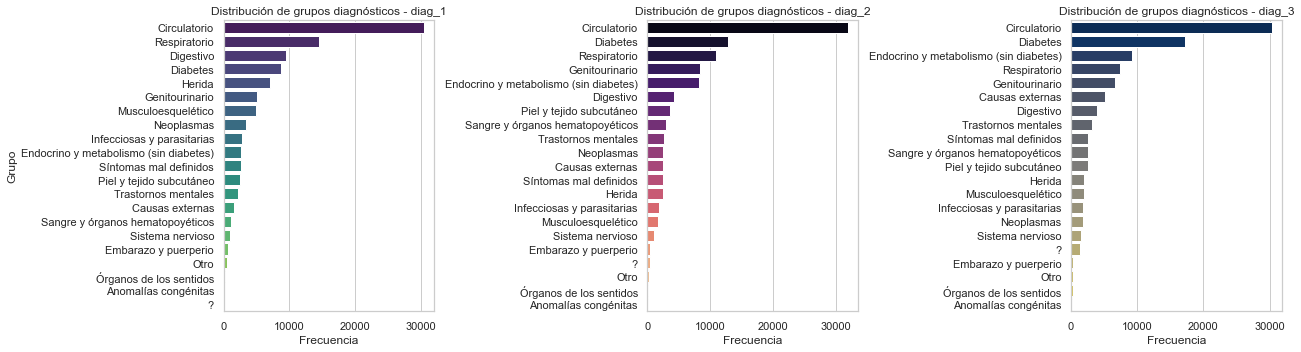

In [ ]:
# Estilo general
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# Gr√°fico para diag_1
plt.subplot(1, 3, 1)
sns.countplot(y='diag_1', data=df, order=df['diag_1'].value_counts().index, palette='viridis')
plt.title('Distribuci√≥n de grupos diagn√≥sticos - diag_1')
plt.xlabel('Frecuencia')
plt.ylabel('Grupo')

# Gr√°fico para diag_2
plt.subplot(1, 3, 2)
sns.countplot(y='diag_2', data=df, order=df['diag_2'].value_counts().index, palette='magma')
plt.title('Distribuci√≥n de grupos diagn√≥sticos - diag_2')
plt.xlabel('Frecuencia')
plt.ylabel('')

# Gr√°fico para diag_3
plt.subplot(1, 3, 3)
sns.countplot(y='diag_3', data=df, order=df['diag_3'].value_counts().index, palette='cividis')
plt.title('Distribuci√≥n de grupos diagn√≥sticos - diag_3')
plt.xlabel('Frecuencia')
plt.ylabel('')

plt.tight_layout()
plt.show()

#### **1.2.2 An√°lisis de Valores Faltantes**


En primera instancia, recurrimos a hacer un mapa de calor y una tabla de valores faltantes para una primera inspecci√≥n.

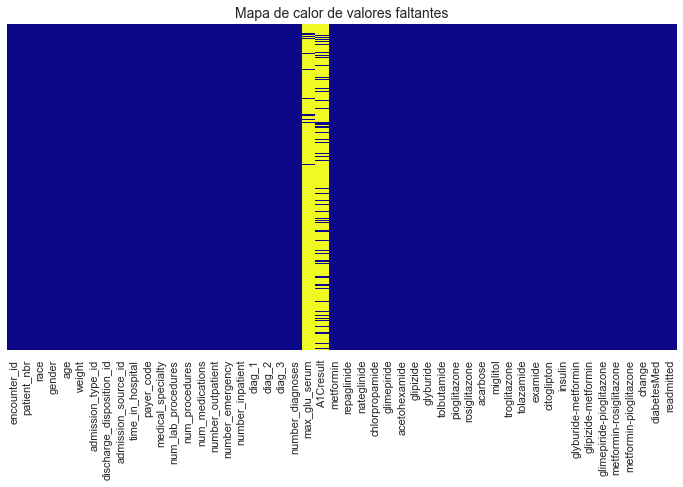

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='plasma')
plt.title("Mapa de calor de valores faltantes", fontsize=14)
plt.show()

In [ ]:
faltantes = df.isnull().sum()
porcentaje = (faltantes / len(df)) * 100

tabla_faltantes = pd.DataFrame({
    'Valores faltantes': faltantes,
    'Porcentaje (%)': porcentaje
})

# Mostrar solo columnas con NA
tabla_faltantes = tabla_faltantes[tabla_faltantes['Valores faltantes'] > 0]
tabla_faltantes.sort_values('Porcentaje (%)', ascending=False)

Valores faltantes  Porcentaje (%)
max_glu_serum              96420       94.746772
A1Cresult                  84748       83.277322

En este an√°lisis identificamos que solo dos variables, ***`max_glu_serum`*** y ***`A1Cresult`***, presentaban valores ausentes seg√∫n Python, con un 94.74% y 83.27% de valores faltantes respectivamente. A primera vista, esta alta proporci√≥n de NaN sugerir√≠a que estas variables deber√≠an eliminarse del an√°lisis.

Sin embargo, al examinar m√°s a fondo el contexto del dataset, notamos que ambas variables son categ√≥ricas y contienen una categor√≠a denominada "None", la cual fue err√≥neamente interpretada por Python como un valor nulo. (vealo en la siguiente tabla)

| Variable       | Tipo       | Descripci√≥n |
|----------------|------------|-------------|
| `max_glu_serum`| Categ√≥rica | Resultado m√°ximo de glucosa en suero. Valores: >200, >300, normal, ***none***. |
| `A1Cresult`    | Categ√≥rica | Resultado de hemoglobina A1C. Valores: >8, >7, normal, ***none***. |

Adicionalmente, descubrimos que en este conjunto de datos los valores realmente faltantes se representan mediante el s√≠mbolo "?", por lo que no son detectados autom√°ticamente como nulos al cargar el archivo. (Vealo en la siguiente Imagen)

![Mapa de calor de valores faltantes](Imagenes/Valores_Faltantes_Datos.png)

El paso a seguir es reemplazar manualmente estos s√≠mbolos para permitir un tratamiento adecuado de los valores ausentes en etapas posteriores del an√°lisis.

In [ ]:

#Se reemplaza los "na" que en realidad son una categoria por el string none
df['max_glu_serum'] = df['max_glu_serum'].fillna('none')
df['A1Cresult'] =df['A1Cresult'].fillna('none')

# Reemplazar '?' por NaN
df= df.replace('?', np.nan)

faltantes = df.isnull().sum()
porcentaje = (faltantes / len(df)) * 100

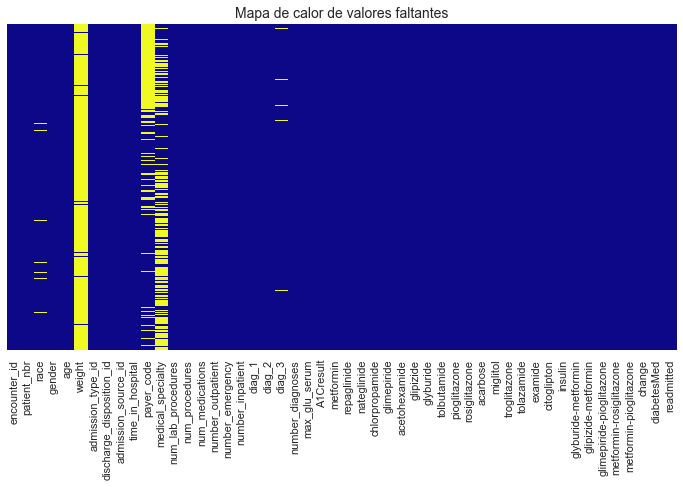

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='plasma')
plt.title("Mapa de calor de valores faltantes", fontsize=14)
plt.show()

Es evidente que, tras reemplazar el signo "?" por valores nulos (NaN), se revelan los verdaderos datos faltantes en el conjunto. Asimismo, se puede observar que las variables `max_glu_serum` y `A1Cresult` ya no presentan valores ausentes, ya que la categor√≠a "none" fue correctamente interpretada como una respuesta v√°lida.

El siguiente paso consiste en evaluar el tratamiento adecuado para los valores faltantes restantes, considerando tanto la naturaleza de cada variable como el porcentaje de datos ausentes que presenta en el conjunto.

In [ ]:
tabla_faltantes = pd.DataFrame({
    'Valores faltantes': faltantes,
    'Porcentaje (%)': porcentaje
})

# Mostrar solo columnas con NA
tabla_faltantes = tabla_faltantes[tabla_faltantes['Valores faltantes'] > 0]
tabla_faltantes.sort_values('Porcentaje (%)', ascending=False)

Valores faltantes  Porcentaje (%)
weight                         98569       96.858479
medical_specialty              49949       49.082208
payer_code                     40256       39.557416
race                            2273        2.233555
diag_3                          1423        1.398306
diag_2                           358        0.351787
diag_1                            21        0.020636

Ahora observamos que la variable ***weight*** presenta un ***96.86%*** de datos faltantes. Dado que este porcentaje es extremadamente alto, cualquier t√©cnica de imputaci√≥n resultar√≠a ineficiente y podr√≠a introducir sesgos significativos en el an√°lisis, comprometiendo la validez de los resultados. Por esta raz√≥n, se decide excluir esta variable del an√°lisis.

En el caso de las variables ***medical_specialty*** y ***payer_code***, los porcentajes de valores faltantes son de ***49.08%*** y ***39.55%***, respectivamente. Estos porcentajes no son lo suficientemente bajos como para aplicar t√©cnicas de imputaci√≥n sin riesgo de introducir sesgos, pero tampoco tan altos como para justificar directamente su eliminaci√≥n del an√°lisis. Por tanto, recurriremos a agrupar estos NaN es una nueva categoria llamada ***"Unknown"***.

Las variables ***race***, ***diag_1***, ***diag_2*** y ***diag_3*** tienen un porcentaje de NaN del ***2.23%***, ***1.29%***, ***0.35%*** y ***0.02*** respectivamente. Al ser porcentajes  peque√±oS recurriremos a hacer imputaci√≥n por la moda para los tres casos.

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)    NaN   
1        149190     55629189        Caucasian  Female  [10-20)    NaN   
2         64410     86047875  AfricanAmerican  Female  [20-30)    NaN   
3        500364     82442376        Caucasian    Male  [30-40)    NaN   
4         16680     42519267        Caucasian    Male  [40-50)    NaN   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                 1        NaN  Pediatrics-Endocrinology                  41   
1                 3        NaN                       NaN                  59   
2                 2        NaN                       NaN                  11   
3                 2        NaN                       NaN                  44   
4                 1        NaN                       NaN                  51   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   

   number_inpatient                                  diag_1      diag_2  \
0                 0                                Diabetes         NaN   
1                 0  Endocrino y metabolismo (sin diabetes)    Diabetes   
2                 1                    Embarazo y puerperio    Diabetes   
3                 0              Infecciosas y parasitarias    Diabetes   
4                 0                              Neoplasmas  Neoplasmas   

                                   diag_3  number_diagnoses max_glu_serum  \
0                                     NaN                 1          none   
1  Endocrino y metabolismo (sin diabetes)                 9          none   
2                         Causas externas                 6          none   
3                            Circulatorio                 7          none   
4                                Diabetes                 5          none   

  A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride  \
0      none        No          No          No             No          No   
1      none        No          No          No             No          No   
2      none        No          No          No             No          No   
3      none        No          No          No             No          No   
4      none        No          No          No             No          No   

  acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone  \
0            No        No        No          No           No            No   
1            No        No        No          No           No            No   
2            No    Steady        No          No           No            No   
3            No        No        No          No           No            No   
4            No    Steady        No          No           No            No   

  acarbose miglitol troglitazone tolazamide examide citoglipton insulin  \
0       No       No           No         No      No          No      No   
1       No       No           No         No      No          No      Up   
2       No       No           No         No      No          No      No   
3       No       No           No         No      No          No  

In [ ]:
df.drop(columns=['weight'], inplace=True) #Se elimina

#remplazamos los na por categorias dado que son porcentajes grandes o irrelevantes para imputar
df['medical_specialty'] = df['medical_specialty'].fillna('Unknown')
df['payer_code'] = df['payer_code'].fillna('Unknown')

#Imputaci√≥n por la moda
var_imputar = ['race', 'diag_1', 'diag_2', 'diag_3']
for name_var in var_imputar:
    moda = df[name_var].mode()[0]
    df[name_var] = df[name_var].fillna(moda)

df.head()    

encounter_id  patient_nbr             race  gender      age  \
0       2278392      8222157        Caucasian  Female   [0-10)   
1        149190     55629189        Caucasian  Female  [10-20)   
2         64410     86047875  AfricanAmerican  Female  [20-30)   
3        500364     82442376        Caucasian    Male  [30-40)   
4         16680     42519267        Caucasian    Male  [40-50)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                 1    Unknown  Pediatrics-Endocrinology                  41   
1                 3    Unknown                   Unknown                  59   
2                 2    Unknown                   Unknown                  11   
3                 2    Unknown                   Unknown                  44   
4                 1    Unknown                   Unknown                  51   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   

   number_inpatient                                  diag_1        diag_2  \
0                 0                                Diabetes  Circulatorio   
1                 0  Endocrino y metabolismo (sin diabetes)      Diabetes   
2                 1                    Embarazo y puerperio      Diabetes   
3                 0              Infecciosas y parasitarias      Diabetes   
4                 0                              Neoplasmas    Neoplasmas   

                                   diag_3  number_diagnoses max_glu_serum  \
0                            Circulatorio                 1          none   
1  Endocrino y metabolismo (sin diabetes)                 9          none   
2                         Causas externas                 6          none   
3                            Circulatorio                 7          none   
4                                Diabetes                 5          none   

  A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride  \
0      none        No          No          No             No          No   
1      none        No          No          No             No          No   
2      none        No          No          No             No          No   
3      none        No          No          No             No          No   
4      none        No          No          No             No          No   

  acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone  \
0            No        No        No          No           No            No   
1            No        No        No          No           No            No   
2            No    Steady        No          No           No            No   
3            No        No        No          No           No            No   
4            No    Steady        No          No           No            No   

  acarbose miglitol troglitazone tolazamide examide citoglipton insulin  \
0       No       No           No         No      No          No      No   
1       No       No           No         No      No          No      Up   
2       No       No           No         No      No          No      No   
3       No       No           No         No      No          No      Up   
4       No       No 

#### **1.2.3 Codificar las variables categ√≥ricas**

En este dataset nos encontramos con una gran proporci√≥n de variables categ√≥ricas, las cuales debemos codificar para que puedan ser utilizadas posteriormente en un modelo.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


cat_cols = df.select_dtypes(include='object').columns

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, encoded_missing_value=np.nan)
df[cat_cols] = encoder.fit_transform(df[cat_cols])

df.head()

encounter_id  patient_nbr  race  gender  age  admission_type_id  \
0       2278392      8222157   2.0     0.0  0.0                  6   
1        149190     55629189   2.0     0.0  1.0                  1   
2         64410     86047875   0.0     0.0  2.0                  1   
3        500364     82442376   2.0     1.0  3.0                  1   
4         16680     42519267   2.0     1.0  4.0                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
0                        25                    1                 1   
1                         1                    7                 3   
2                         1                    7                 2   
3                         1                    7                 2   
4                         1                    7                 1   

   payer_code  medical_specialty  num_lab_procedures  num_procedures  \
0        16.0               37.0                  41               0   
1        16.0               71.0                  59               0   
2        16.0               71.0                  11               5   
3        16.0               71.0                  44               1   
4        16.0               71.0                  51               0   

   num_medications  number_outpatient  number_emergency  number_inpatient  \
0                1                  0                 0                 0   
1               18                  0                 0                 0   
2               13                  2                 0                 1   
3               16                  0                 0                 0   
4                8                  0                 0                 0   

   diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  \
0     3.0     2.0     2.0                 1            3.0        3.0   
1     6.0     3.0     6.0                 9            3.0        3.0   
2     5.0     3.0     1.0                 6            3.0        3.0   
3     9.0     3.0     2.0                 7            3.0        3.0   
4    11.0    11.0     3.0                 5            3.0        3.0   

   metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  \
0        1.0          1.0          1.0             1.0          1.0   
1        1.0          1.0          1.0             1.0          1.0   
2        1.0          1.0          1.0             1.0          1.0   
3        1.0          1.0          1.0             1.0          1.0   
4        1.0          1.0          1.0             1.0          1.0   

   acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  \
0            0.0        1.0        1.0          0.0           1.0   
1            0.0        1.0        1.0          0.0           1.0   
2            0.0        2.0        1.0          0.0           1.0   
3            0.0        1.0        1.0          0.0           1.0   
4            0.0        2.0        1.0          0.0           1.0   

   rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  \
0            1.0       1.0       1.0           0.0         0.0      0.0   
1            1.0       1.0       1.0           0.0         0.0      0.0   
2            1.0       1.0       1.0           0.0         0.0      0.0   
3            1.0       1.0       1.0           0.0         0.0      0.0   
4            1.0       1.0       1.0           0.0         0.0      0.0   

   citoglipton  insulin  glyburide-metformin  glipizide-metformin  \
0          0.0      1.0                  1.0                  0.0   
1          0.0      3.0                  1.0                  0.0   
2          0.0      1.0                  1.0                  0.0   
3          0.0      3.0                  1.0                  0.0   
4          0.0      2.0                  1.0                  0.0   

   glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  \
0                       0.0           

La codificaci√≥n se complet√≥ correctamente, y en el siguiente fragmento de c√≥digo se podr√° observar qu√© n√∫mero fue asignado a cada categor√≠a mediante la codificaci√≥n.

In [ ]:
#ver como se codificaron las variables
for col, cats in zip(cat_cols, encoder.categories_):
    print(f"Columna: {col}")
    for i, cat in enumerate(cats):
        print(f"  {cat} ‚Üí {i}")

Columna: race
  AfricanAmerican ‚Üí 0
  Asian ‚Üí 1
  Caucasian ‚Üí 2
  Hispanic ‚Üí 3
  Other ‚Üí 4
Columna: gender
  Female ‚Üí 0
  Male ‚Üí 1
  Unknown/Invalid ‚Üí 2
Columna: age
  [0-10) ‚Üí 0
  [10-20) ‚Üí 1
  [20-30) ‚Üí 2
  [30-40) ‚Üí 3
  [40-50) ‚Üí 4
  [50-60) ‚Üí 5
  [60-70) ‚Üí 6
  [70-80) ‚Üí 7
  [80-90) ‚Üí 8
  [90-100) ‚Üí 9
Columna: payer_code
  BC ‚Üí 0
  CH ‚Üí 1
  CM ‚Üí 2
  CP ‚Üí 3
  DM ‚Üí 4
  FR ‚Üí 5
  HM ‚Üí 6
  MC ‚Üí 7
  MD ‚Üí 8
  MP ‚Üí 9
  OG ‚Üí 10
  OT ‚Üí 11
  PO ‚Üí 12
  SI ‚Üí 13
  SP ‚Üí 14
  UN ‚Üí 15
  Unknown ‚Üí 16
  WC ‚Üí 17
Columna: medical_specialty
  AllergyandImmunology ‚Üí 0
  Anesthesiology ‚Üí 1
  Anesthesiology-Pediatric ‚Üí 2
  Cardiology ‚Üí 3
  Cardiology-Pediatric ‚Üí 4
  DCPTEAM ‚Üí 5
  Dentistry ‚Üí 6
  Dermatology ‚Üí 7
  Emergency/Trauma ‚Üí 8
  Endocrinology ‚Üí 9
  Endocrinology-Metabolism ‚Üí 10
  Family/GeneralPractice ‚Üí 11
  Gastroenterology ‚Üí 12
  Gynecology ‚Üí 13
  Hematology ‚Üí 14
  Hematology/Oncology ‚Üí 15
  Hos

In [ ]:
categorical_vars = [
    "race", "gender", "age", "admission_type_id", "discharge_disposition_id",
    "admission_source_id", "payer_code", "medical_specialty", "max_glu_serum",
    "A1Cresult", "metformin", "repaglinide", "nateglinide", "chlorpropamide",
    "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide",
    "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone",
    "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin",
    "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone",
    "metformin-pioglitazone", "change", "diabetesMed", "readmitted"
]

for col in categorical_vars: 
    df[col] = df[col].astype('category')
    df[col].unique()
    df[col].value_counts()

## **2. An√°lisis Descriptivo**

### **2.1 Variables Num√©ricas**

#### **2.1.1. Resumen Estad√≠stico**

In [ ]:
columnas_numericas = ["time_in_hospital","num_lab_procedures","num_procedures", "num_medications",
"number_outpatient","number_emergency","number_inpatient","number_diagnoses"]

numericas = df[columnas_numericas]
print(numericas.describe().T)

                       count       mean        std  min   25%   50%   75%  \
time_in_hospital    101766.0   4.395987   2.985108  1.0   2.0   4.0   6.0   
num_lab_procedures  101766.0  43.095641  19.674362  1.0  31.0  44.0  57.0   
num_procedures      101766.0   1.339730   1.705807  0.0   0.0   1.0   2.0   
num_medications     101766.0  16.021844   8.127566  1.0  10.0  15.0  20.0   
number_outpatient   101766.0   0.369357   1.267265  0.0   0.0   0.0   0.0   
number_emergency    101766.0   0.197836   0.930472  0.0   0.0   0.0   0.0   
number_inpatient    101766.0   0.635566   1.262863  0.0   0.0   0.0   1.0   
number_diagnoses    101766.0   7.422607   1.933600  1.0   6.0   8.0   9.0   

                      max  
time_in_hospital     14.0  
num_lab_procedures  132.0  
num_procedures        6.0  
num_medications      81.0  
number_outpatient    42.0  
number_emergency     76.0  
number_inpatient     21.0  
number_diagnoses     16.0  



En esta imagen se pueden observar 8 diagramas de barras correspondientes a cada variable num√©rica. 
* **Tiempo en el Hospital (`time_in_hospital`):** La gr√°fica muestra una distribuci√≥n claramente sesgada a la derecha. La mayor√≠a de los pacientes permanecen en el hospital entre 2 y 5 d√≠as, siendo 4 d√≠as la duraci√≥n m√°s frecuente. A medida que aumenta el n√∫mero de d√≠as, la frecuencia disminuye significativamente, lo que indica que solo una peque√±a proporci√≥n de pacientes permanece m√°s de 10 d√≠as hospitalizado.
* **Numero de Procedimientos de Laboratorio (`num_lab_procedures`):** La distribuci√≥n es ligeramente sim√©trica, con una concentraci√≥n de valores entre 40 y 60 procedimientos, siendo alrededor de 50 la cantidad m√°s frecuente. Aunque hay presencia de valores cercanos a cero, su frecuencia es considerablemente menor. Esta variable refleja una variabilidad moderada y una tendencia central bien definida.
* **N√∫mero de Procedimientos Distintos(`num_procedures`):** Se observa una distribuci√≥n marcadamente sesgada a la derecha, ya que la mayor parte de los pacientes recibi√≥ solo un procedimiento. La frecuencia disminuye conforme aumenta el n√∫mero de procedimientos, lo que indica que pocos pacientes son sometidos a m√°s de 3 o 4 procedimientos.
* **N√∫mero de medicamentos (`num_medications`):** La gr√°fica indica que la mayor√≠a de los pacientes recibi√≥ entre 10 y 20 medicamentos, siendo esta la moda. La distribuci√≥n est√° ligeramente sesgada a la derecha, ya que existe un n√∫mero reducido de pacientes a quienes se les administraron m√°s de 40 medicamentos, aunque en menor proporci√≥n.
* **N√∫mero de visitas ambulatorias (`number_outpatient`):** Esta variable muestra una distribuci√≥n altamente sesgada a la derecha, con una fuerte concentraci√≥n de pacientes que no registraron visitas ambulatorias (valor 0). Existen algunos valores at√≠picos con m√°s de 20 visitas, pero representan una fracci√≥n muy peque√±a de los casos.
* **N√∫mero de visitas a urgencias (`number_emergency`):** Esta variable presenta una distribuci√≥n fuertemente sesgada a la derecha, donde la gran mayor√≠a de los pacientes no tuvo ninguna visita a urgencias. Las frecuencias caen dr√°sticamente con el aumento en el n√∫mero de visitas.
* **N√∫mero de ingresos hospitalarios (`number_inpatient`):** Se evidencia tambi√©n un sesgo a la derecha, ya que la mayor√≠a de los pacientes no reportaron ingresos hospitalarios recientes. Solo una peque√±a parte de la poblaci√≥n muestra m√∫ltiples ingresos, y estos casos son poco frecuentes.
* **N√∫mero de diagn√≥sticos registrados (`number_diagnoses` ):** Esta muestra una distribuci√≥n sesgada a la izquierda, con una clara concentraci√≥n de pacientes que tienen 10 diagn√≥sticos registrados, lo que representa el valor m√°s frecuente. Los valores m√°s bajos son menos comunes, lo que indica que la mayor√≠a de los pacientes presenta un n√∫mero alto de diagn√≥sticos documentados.

#### **2.1.2. Gr√°ficos**

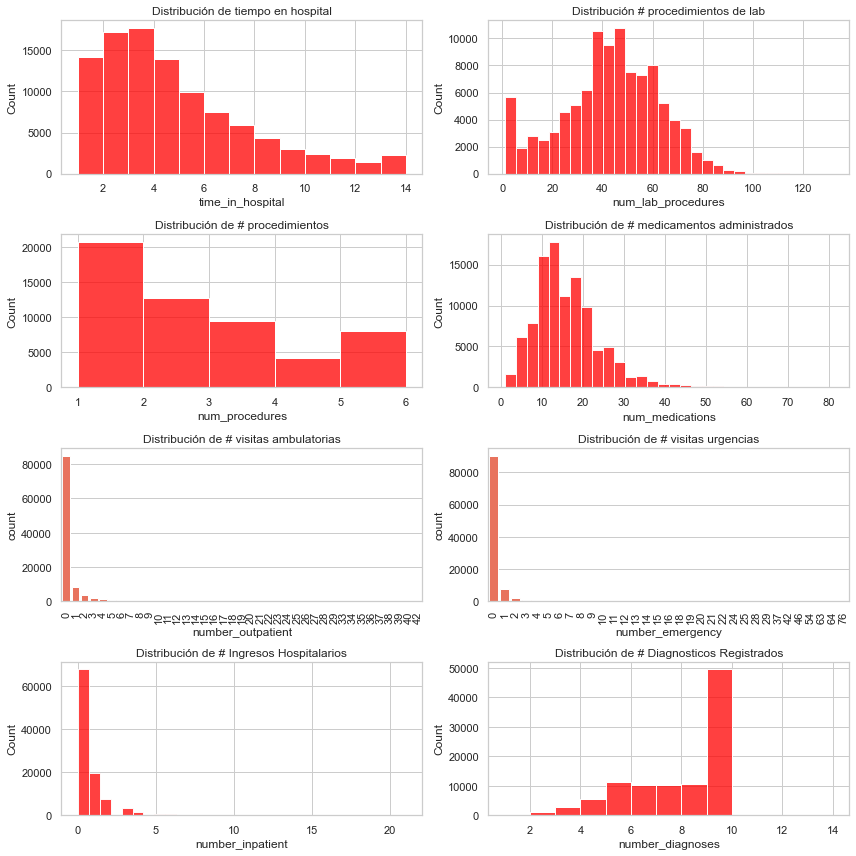

In [ ]:
#DIBUJAR HISTOGRAMAS
fig, axs = plt.subplots(4, 2, figsize=(12,12))  # 2 filas, 3 columnas
axs = axs.flatten()  # Aplanamos para indexar como una lista

sns.histplot(df['time_in_hospital'], bins=range(1, 15),ax=axs[0], color='red', kde=False)
axs[0].set_title('Distribuci√≥n de tiempo en hospital')

sns.histplot(df['num_lab_procedures'], bins=30,ax=axs[1], color='red', kde=False)
axs[1].set_title('Distribuci√≥n # procedimientos de lab')

sns.histplot(df['num_procedures'], bins=range(1,7),ax=axs[2], color='red', kde=False)
axs[2].set_title('Distribuci√≥n de # procedimientos')

sns.histplot(df['num_medications'], bins=30,ax=axs[3], color='red', kde=False)
axs[3].set_title('Distribuci√≥n de # medicamentos administrados')

sns.countplot(x='number_outpatient', data=df, color='tomato', ax=axs[4])
axs[4].set_title('Distribuci√≥n de # visitas ambulatorias')
axs[4].tick_params(axis='x', labelrotation=90)

sns.countplot(x='number_emergency', data=df, color='tomato', ax=axs[5])
axs[5].set_title('Distribuci√≥n de # visitas urgencias')
axs[5].tick_params(axis='x', labelrotation=90)

sns.histplot(df['number_inpatient'], bins=30,ax=axs[6], color='red', kde=False)
axs[6].set_title('Distribuci√≥n de # Ingresos Hospitalarios')

sns.histplot(df['number_diagnoses'], bins=range(1,15),ax=axs[7], color='red', kde=False)
axs[7].set_title('Distribuci√≥n de # Diagnosticos Registrados')

plt.tight_layout()


En esta imagen se pueden observar 8 diagramas de barras correspondientes a cada variable num√©rica. 
* **Tiempo en el Hospital (`time_in_hospital`):** La gr√°fica muestra una distribuci√≥n claramente sesgada a la derecha. La mayor√≠a de los pacientes permanecen en el hospital entre 2 y 5 d√≠as, siendo 4 d√≠as la duraci√≥n m√°s frecuente. A medida que aumenta el n√∫mero de d√≠as, la frecuencia disminuye significativamente, lo que indica que solo una peque√±a proporci√≥n de pacientes permanece m√°s de 10 d√≠as hospitalizado.
* **Numero de Procedimientos de Laboratorio (`num_lab_procedures`):**  La distribuci√≥n es ligeramente sim√©trica, con una concentraci√≥n de valores entre 40 y 60 procedimientos, siendo alrededor de 50 la cantidad m√°s frecuente. Aunque hay presencia de valores cercanos a cero, su frecuencia es considerablemente menor. Esta variable refleja una variabilidad moderada y una tendencia central bien definida.
* **N√∫mero de Procedimientos Distintos(`num_procedures`):** Se observa una distribuci√≥n marcadamente sesgada a la derecha, ya que la mayor parte de los pacientes recibi√≥ solo un procedimiento. La frecuencia disminuye conforme aumenta el n√∫mero de procedimientos, lo que indica que pocos pacientes son sometidos a m√°s de 3 o 4 procedimientos.
* **N√∫mero de medicamentos (`num_medications`):** La gr√°fica indica que la mayor√≠a de los pacientes recibi√≥ entre 10 y 20 medicamentos, siendo esta la moda. La distribuci√≥n est√° ligeramente sesgada a la derecha, ya que existe un n√∫mero reducido de pacientes a quienes se les administraron m√°s de 40 medicamentos, aunque en menor proporci√≥n.
* **N√∫mero de visitas ambulatorias (`number_outpatient`):** Esta variable muestra una distribuci√≥n altamente sesgada a la derecha, con una fuerte concentraci√≥n de pacientes que no registraron visitas ambulatorias (valor 0). Existen algunos valores at√≠picos con m√°s de 20 visitas, pero representan una fracci√≥n muy peque√±a de los casos.
* **N√∫mero de visitas a urgencias (`number_emergency`):** Esta variable presenta una distribuci√≥n fuertemente sesgada a la derecha, donde la gran mayor√≠a de los pacientes no tuvo ninguna visita a urgencias. Las frecuencias caen dr√°sticamente con el aumento en el n√∫mero de visitas.
* **N√∫mero de ingresos hospitalarios (`number_inpatient`):** Se evidencia tambi√©n un sesgo a la derecha, ya que la mayor√≠a de los pacientes no reportaron ingresos hospitalarios recientes. Solo una peque√±a parte de la poblaci√≥n muestra m√∫ltiples ingresos, y estos casos son poco frecuentes.
* **N√∫mero de diagn√≥sticos registrados (`number_diagnoses` ):** Esta muestra una distribuci√≥n sesgada a la izquierda, con una clara concentraci√≥n de pacientes que tienen 10 diagn√≥sticos registrados, lo que representa el valor m√°s frecuente. Los valores m√°s bajos son menos comunes, lo que indica que la mayor√≠a de los pacientes presenta un n√∫mero alto de diagn√≥sticos documentados.


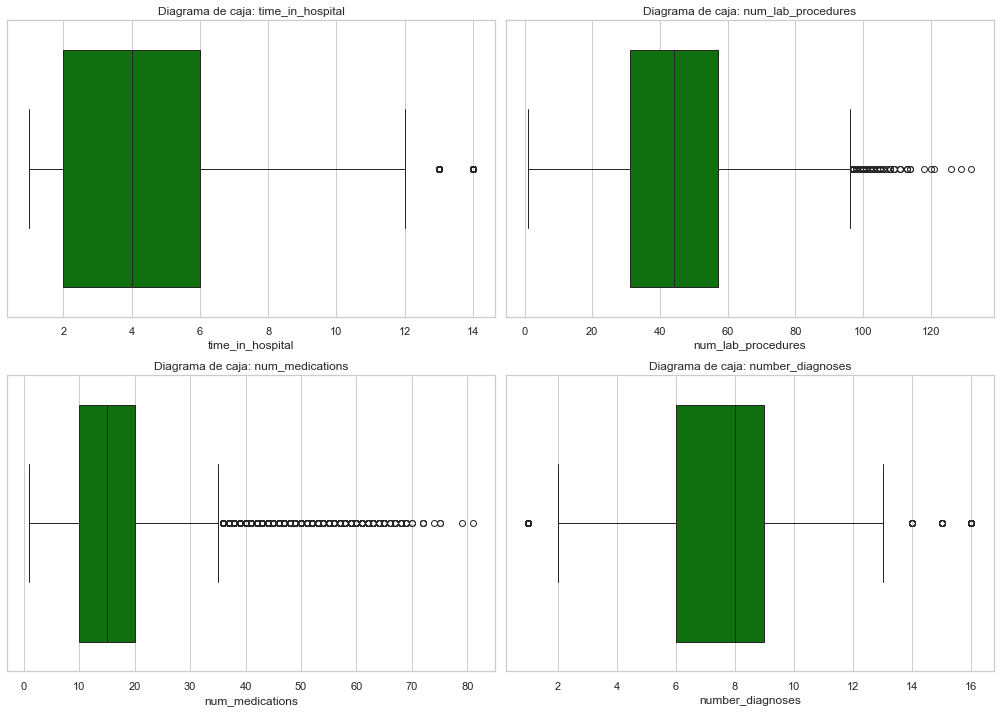

In [ ]:
# Lista de variables
columnas_boxplot = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']

# Crear figura con 2x2 subgr√°ficos
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Boxplots horizontales
for i, col in enumerate(columnas_boxplot):
    sns.boxplot(x=df[col], ax=axs[i], color='green')
    axs[i].set_title(f'Diagrama de caja: {col}', fontsize=12)
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()

En la imagen anterior, se puede observar 4 gr√°ficas de boxplot correspondientes a las variables num√©ricas con datos m√°s relevantes, pues las cuatro restantes concentran sus datos cercanos a cero. 

Comenzando desde la parte superior izquierda, se observa el diagrama de caja correspondiente a la variable valor ***Tiempo en el Hospital (`time_in_hospital`)***. Este gr√°fico muestra que la mayor√≠a de los pacientes estuvieron hospitalizados entre 2 y 6 d√≠as, lo que indica una concentraci√≥n de valores en ese rango. La mediana se sit√∫a aproximadamente en 4 d√≠as. Se aprecia una distribuci√≥n ligeramente sesgada a la derecha, ya que la mayor parte de los datos se encuentra en los valores m√°s bajos. Adem√°s, se identifican dos valores at√≠picos en 13 y 14 d√≠as, lo que sugiere que unos pocos pacientes tuvieron estancias hospitalarias significativamente m√°s prolongadas que el promedio.

Por otra parte, el diagrama de caja correspondiente a la variable ***Numero de Procedimientos de Laboratorio (`num_lab_procedures`)*** muestra que la mayor√≠a de los pacientes se sometieron a entre 30 y 58 procedimientos de laboratorio, con una mediana cercana a los 45 procedimientos. Adem√°s, se observan m√∫ltiples valores at√≠picos por encima de los 97 procedimientos aproximadamente, lo que indica que algunos pacientes fueron sometidos a una cantidad inusualmente alta de ex√°menes.

Continuando con la parte inferior de la imagen, se encuentra la gr√°fica de la variable ***N√∫mero de medicamentos (`num_medications`)***. Esta indica que a la mayor√≠a de los pacientes se les receta entre 10 a 20 medicamentos. La mediana se sit√∫a aproximadamente en 14 medicamentos. La distribuci√≥n presenta un claro sesgo a la derecha, evidenciado por una gran cantidad de valores at√≠picos que superan los 35 medicamentos, alcanzando incluso cifras cercanas a 85. Esto sugiere que, aunque la mayor√≠a de los pacientes recibi√≥ una cantidad moderada de medicamentos, existe un subconjunto que requiri√≥ tratamientos mucho m√°s complejos, posiblemente debido a la presencia de m√∫ltiples complicaciones cl√≠nicas.

Por √∫ltimo, se presenta el diagrama de caja correspondiente a la variable ***N√∫mero de diagn√≥sticos registrados (`number_diagnoses`)***. En este gr√°fico se observa una distribuci√≥n relativamente sim√©trica, ya que la mediana se encuentra en una posici√≥n central, alrededor de los 8 diagn√≥sticos por paciente. La mayor√≠a de los datos se concentran entre aproximadamente 6 y 9 diagn√≥sticos, lo que indica una baja dispersi√≥n en la parte central de la distribuci√≥n. Se identifican cuatro valores at√≠picos: uno inferior cercano a 1 diagn√≥stico, y tres superiores, a partir de los 14 diagn√≥sticos por paciente. Estos outliers indican que, aunque la mayor√≠a de los pacientes recibe un n√∫mero moderado de diagn√≥sticos, existen casos excepcionales con cargas diagn√≥sticas significativamente mayores o menores. En conjunto, este gr√°fico sugiere que la pr√°ctica m√©dica tiende a generar entre 6 y 9 diagn√≥sticos por paciente, aunque en ciertos casos particulares se observan registros considerablemente m√°s extremos.

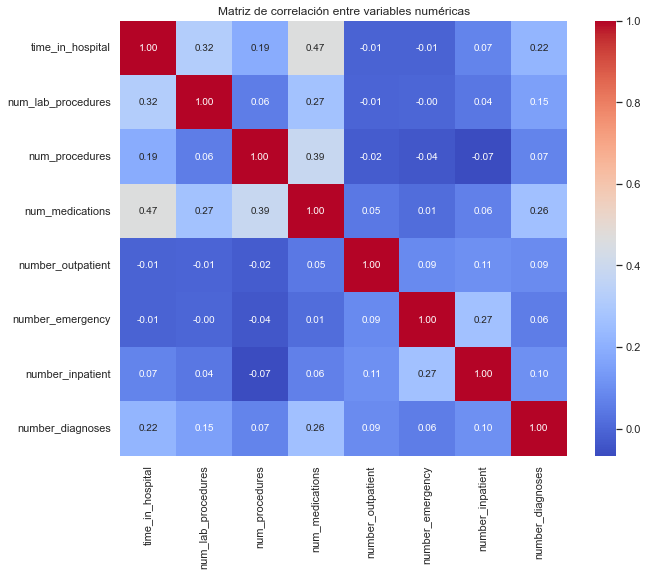

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[columnas_numericas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlaci√≥n entre variables num√©ricas')
plt.show()

La matriz de correlaci√≥n indica que no existen relaciones lineales fuertes entre las variables num√©ricas del conjunto de datos. La mayor√≠a de los coeficientes de correlaci√≥n se sit√∫an cerca de cero, lo que sugiere una asociaci√≥n d√©bil o inexistente entre las variables. La correlaci√≥n m√°s alta observada es de 0.47 entre `time_in_hospital` y `num_medications`, lo cual representa una relaci√≥n moderada. Tambi√©n se evidencia una correlaci√≥n leve de 0.39 entre `num_procedures` y `num_medications`. En general, los valores sugieren que las variables num√©ricas analizadas tienden a comportarse de manera independiente unas de otras.

### **2.2 Variables Categ√≥ricas**

#### **2.2.1 Resumen**

In [ ]:
# Crear lista con la info resumen de las variables categ√≥ricas
summary = []

for col in cat_cols:
    total = len(df)
    n_missing = df[col].isna().sum()
    n_unique = df[col].nunique(dropna=True)
    top = df[col].value_counts(dropna=True).idxmax()
    freq = df[col].value_counts(dropna=True).max()
    top_pct = (freq / total) * 100

    summary.append({
        'Variable': col,
        'Categor√≠as √∫nicas': n_unique,
        'Valor m√°s frecuente': top,
        'Frecuencia': freq,
        '% del m√°s frecuente': round(top_pct, 2),
        'Nulos': n_missing
    })

# Convertir a DataFrame para visualizar como tabla
summary_df = pd.DataFrame(summary)

# Ordenar si deseas
summary_df = summary_df.sort_values(by='Categor√≠as √∫nicas', ascending=False)

# Mostrar como tabla
summary_df.style.set_caption("Resumen de variables categ√≥ricas")

***Interpretaci√≥n***

El resumen de las variables categ√≥ricas revela una alta proporci√≥n de valores dominantes en la mayor√≠a de las variables. Por ejemplo, variables como glyburide-metformin, metformin-pioglitazone, glipizide-metformin, troglitazone, entre otras, presentan una distribuci√≥n extremadamente desbalanceada, con un √∫nico valor que representa el 100% o casi el 100% de los casos, lo cual indica una falta de variabilidad y sugiere que podr√≠an no aportar informaci√≥n √∫til al modelo o an√°lisis. En contraste, variables como race, gender y readmitted muestran distribuciones m√°s heterog√©neas, con porcentajes m√°s bajos del valor m√°s frecuente, lo que las convierte en candidatas m√°s informativas. Asimismo, algunas variables como medical_specialty y payer_code presentan una alta cantidad de categor√≠as (73 y 18 respectivamente), lo cual podr√≠a introducir complejidad en el an√°lisis y requerir estrategias como agrupaci√≥n o codificaci√≥n especial. Finalmente, ninguna de las variables categ√≥ricas contiene valores nulos, lo cual facilita su procesamiento posterior.

#### **2.2.2. Gr√°ficos**

In [ ]:

cat_ident = [
    'encounter_id', 'patient_nbr'
]
n_cols_ident = len(cat_ident)

cat_dem_ing = [
    'race', 'gender', 'age', 'admission_type_id',
    'discharge_disposition_id', 'admission_source_id',
    'time_in_hospital'
]
n_cols_dem_ing = len(cat_dem_ing)

cat_prue_proced = [
    'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient',
    'number_diagnoses'
]
n_cols_prue_proced = len(cat_prue_proced)

cat_diag_princ = [
    'diag_1', 'diag_2', 'diag_3' 
]
n_cols_diag_princ= len(cat_diag_princ)

cat_resultados_lab = [
    'max_glu_serum', 'A1Cresult'
]
n_cols_resultados_lab = len(cat_resultados_lab)

cat_meds = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'miglitol', 'troglitazone', 'tolazamide', 'examide',
    'citoglipton', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone'
]
n_cols_meds = len(cat_meds)

cat_control_tratamiento = [
    'change', 'diabetesMed'
]
n_cols_control_tratamiento = len(cat_control_tratamiento)

cat_objetivo = [
    'readmitted'
]
n_cols_objetivo = len(cat_objetivo)


In [ ]:
def graficar_cat(n_cols, cat, figura_num=1, titulo_general=None, palette='Set2'):
    import math
    import matplotlib.pyplot as plt
    import seaborn as sns

    # N√∫mero de columnas fijas
    cols = 3
    rows = math.ceil(n_cols / cols)

    # Crear figura
    fig, axs = plt.subplots(rows, cols, figsize=(cols*6, rows*4))
    axs = axs.flatten()

    for i, col in enumerate(cat):
        ax = axs[i]
        n_cat = df[col].nunique()

        if n_cat <= 10:
            orden = df[col].value_counts().sort_values(ascending=False).index
            sns.countplot(x=col, data=df, order=orden, ax=ax, palette=palette)
        else:
            top_10 = df[col].value_counts().nlargest(10)
            categorias_ordenadas = top_10.index
            frecuencias = top_10.values
            sns.barplot(x=categorias_ordenadas, y=frecuencias, ax=ax, palette=palette)

        ax.set_title(f'{col} ({n_cat} cat.)', fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('Frecuencia')
        ax.tick_params(axis='x', rotation=45)

    # Eliminar ejes vac√≠os
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    # Ajustar el espacio autom√°ticamente
    plt.tight_layout(rect=[0, 0.05, 1, 0.93])  # deja espacio para el t√≠tulo y el pie

    # T√≠tulo general centrado
    if titulo_general:
        fig.text(0.5, 0.96, titulo_general, ha='center', fontsize=16, weight='bold')

    # Pie de figura centrado
    fig.text(0.5, 0.02, f'Figura {figura_num}. {titulo_general}', ha='center', fontsize=12)
    

    plt.show()


#####  **2.2.2.1. Distribuci√≥n de Variables Demogr√°ficas y de Ingreso**

C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2211837392.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=orden, ax=ax, palette=palette)
C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2211837392.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=orden, ax=ax, palette=palette)
C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2211837392.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=orden, ax=ax, palette=palette)
C:\Users\Janus\AppData\Local\Temp/ipyker

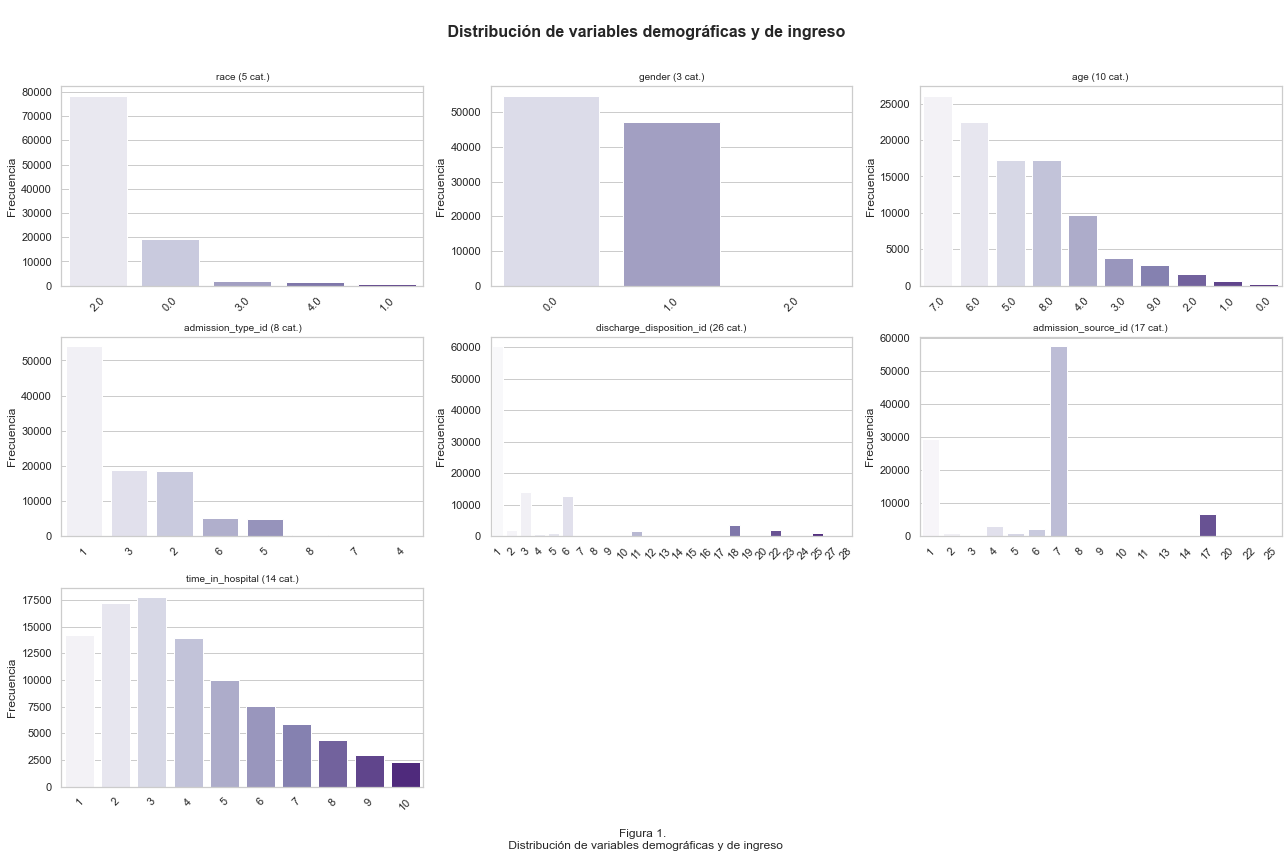

In [ ]:
graficar_cat(n_cols_dem_ing, cat_dem_ing, figura_num=1,
             titulo_general='\n Distribuci√≥n de variables demogr√°ficas y de ingreso',
             palette='Purples')  # o 'Blues', 'coolwarm', etc.

La figura presenta la distribuci√≥n de varias variables categ√≥ricas relacionadas con las caracter√≠sticas demogr√°ficas de los pacientes y su ingreso hospitalario.

- **Raza (`race`)**:  
  Se observa que la mayor√≠a de los pacientes se identifican como **raza 2**, lo cual, seg√∫n la codificaci√≥n del dataset, corresponde a pacientes **cauc√°sicos**. Las otras categor√≠as (como afroamericanos, hispanos, asi√°ticos y otros) tienen una representaci√≥n mucho menor.

- **G√©nero (`gender`)**:  
  Hay una leve mayor√≠a de pacientes de **g√©nero 2**, que corresponde a **femenino**, seguido por **g√©nero 1**, que es **masculino**. La categor√≠a **0** (desconocido o inv√°lido) es m√≠nima.

- **Edad (`age`)**:  
  La mayor√≠a de los pacientes se encuentran entre **60 y 80 a√±os**, lo cual es coherente con el hecho de que la **diabetes tipo 2** y sus complicaciones son m√°s comunes en adultos mayores.  
  Los intervalos de edad est√°n codificados (ej. `0 = [0‚Äì10)`, `1 = [10‚Äì20)`, etc.), pero visualmente se evidencia que los valores m√°s frecuentes son de adultos mayores.

- **Tipo de ingreso (`admission_type_id`)**:  
  La categor√≠a m√°s frecuente es la **1**, que corresponde a **urgencias**.  
  Esto indica que la mayor√≠a de las hospitalizaciones fueron por situaciones **no planificadas**.  
  Otras formas de ingreso como consultas referidas o ingreso electivo son mucho menos comunes.

- **Condici√≥n de alta (`discharge_disposition_id`)**:  
  Aunque esta variable tiene muchas categor√≠as, destacan:  
  la **1 (alta a casa)**, seguida por algunas otras como la **3 (alta a otro hospital)** o la **6 (paciente fallecido)**.  
  Esto da una idea de c√≥mo se resolvi√≥ la hospitalizaci√≥n.

- **Fuente de ingreso (`admission_source_id`)**:  
  Se observa un gran predominio de la categor√≠a **7**, que en este caso representa **ingresos desde la sala de emergencias**.  
  Esto refuerza lo anterior, donde se evidenci√≥ que la mayor√≠a de pacientes ingresan por urgencia.

- **Tiempo en el hospital (`time_in_hospital`)**:  
  Aunque hay varios valores, la mayor parte de los pacientes estuvo entre **1 y 4 d√≠as** hospitalizados, con una disminuci√≥n progresiva en los valores mayores.  
  Esto sugiere estancias hospitalarias **relativamente cortas** para la mayor√≠a.

##### **2.2.2.2. Distribuci√≥n de Pruebas, Procedimientos y Medicamentos**

C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2211837392.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorias_ordenadas, y=frecuencias, ax=ax, palette=palette)
C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2211837392.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=orden, ax=ax, palette=palette)
C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2211837392.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorias_ordenadas, y=frecuencias, ax=ax, palette=palette)
C:\Users\Janus\AppData\L

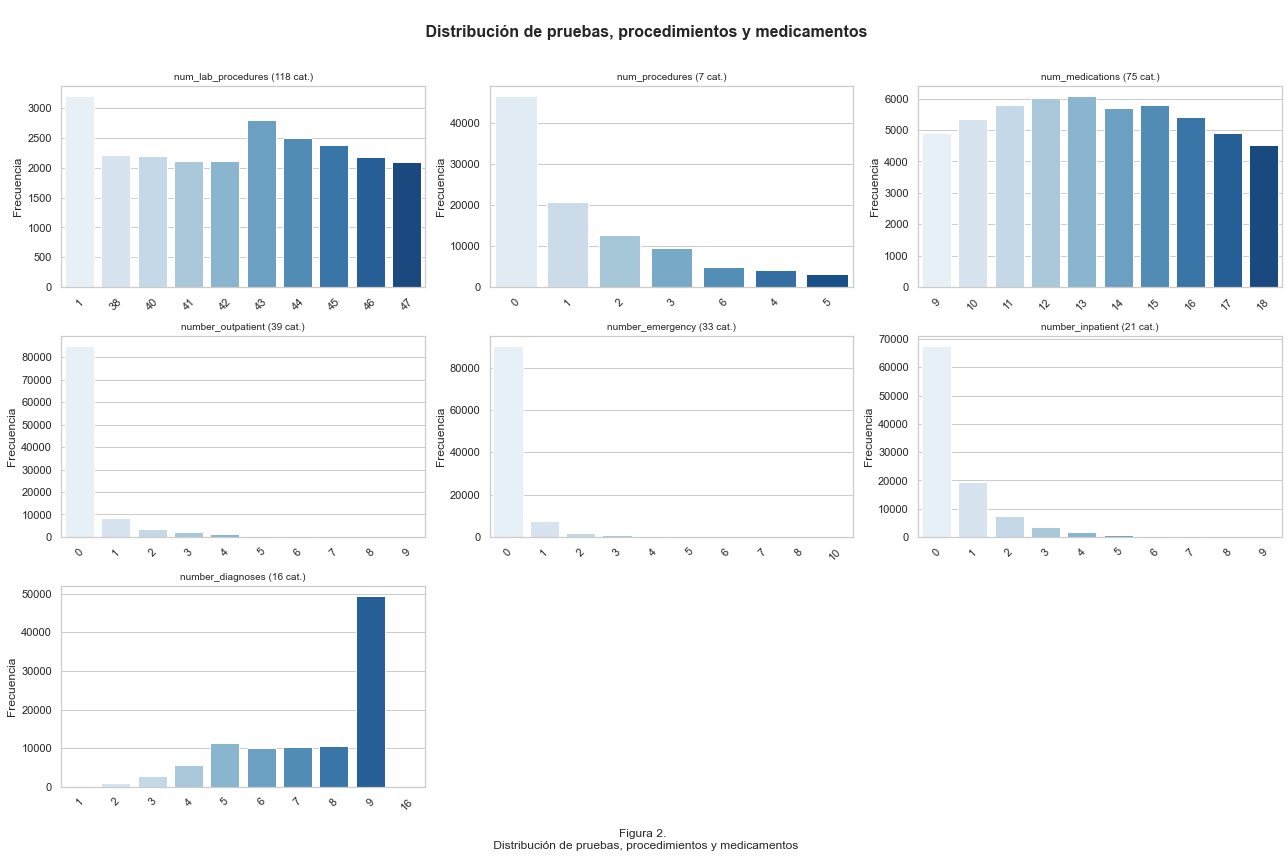

In [ ]:
graficar_cat(n_cols_prue_proced, cat_prue_proced, figura_num=2,
             titulo_general='\n Distribuci√≥n de pruebas, procedimientos y medicamentos',
             palette='Blues')

La figura muestra la distribuci√≥n de diferentes variables relacionadas con los procedimientos m√©dicos, las pruebas realizadas y el n√∫mero de medicamentos administrados durante las hospitalizaciones.

- **N√∫mero de procedimientos de laboratorio (`num_lab_procedures`)**:  
  Esta variable tiene muchas categor√≠as (118), pero se observa que hay una concentraci√≥n importante en valores entre 40 y 70 procedimientos por paciente. Es decir, la mayor√≠a de los pacientes tuvieron una cantidad intermedia de pruebas de laboratorio, lo que sugiere un nivel de monitoreo moderado durante la hospitalizaci√≥n.

- **N√∫mero de procedimientos (`num_procedures`)**:  
  En este caso, la mayor√≠a de los pacientes tuvo **cero o un procedimiento** m√©dico. Las frecuencias disminuyen progresivamente a medida que aumenta el n√∫mero de procedimientos, lo que indica que la intervenci√≥n m√©dica directa no fue tan alta en la mayor√≠a de los casos.

- **N√∫mero de medicamentos (`num_medications`)**:  
  Hay una clara tendencia a la alta cantidad de medicamentos administrados. Las categor√≠as m√°s frecuentes est√°n entre **10 y 18 medicamentos**, lo que podr√≠a indicar tratamientos complejos o presencia de m√∫ltiples condiciones m√©dicas.

- **Consultas externas (`number_outpatient`)**:  
  La mayor√≠a de los pacientes no tuvo consultas externas previas a la hospitalizaci√≥n (valor 0). Solo una peque√±a proporci√≥n tuvo una o m√°s visitas ambulatorias, lo que sugiere que muchos ingresos fueron inesperados o sin seguimiento ambulatorio reciente.

- **Visitas a emergencias (`number_emergency`)**:  
  Al igual que en el caso anterior, la mayor√≠a de los pacientes no tuvo visitas previas a emergencias antes de ser hospitalizados. Esto puede reforzar la idea de que muchos ingresos fueron por primera atenci√≥n de una complicaci√≥n aguda.

- **Consultas internas previas (`number_inpatient`)**:  
  Se observa que la mayor√≠a no tuvo hospitalizaciones anteriores (valor 0), aunque existe una peque√±a proporci√≥n que ha sido hospitalizada previamente en m√∫ltiples ocasiones, lo que puede reflejar casos m√°s cr√≥nicos o severos.

- **Cantidad de diagn√≥sticos (`number_diagnoses`)**:  
  La mayor√≠a de los pacientes tiene registrados **nueve diagn√≥sticos**, que es el valor m√°ximo permitido por la base de datos. Esto indica que muchos pacientes presentan **m√∫ltiples condiciones de salud**, lo que puede reflejar la complejidad cl√≠nica del grupo.

##### **2.2.2.3. Distribuci√≥n de Diagn√≥sticos**

C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2211837392.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorias_ordenadas, y=frecuencias, ax=ax, palette=palette)
C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2211837392.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorias_ordenadas, y=frecuencias, ax=ax, palette=palette)
C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2211837392.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorias_ordenadas, y=frecuencias, ax=ax, palette=palette)


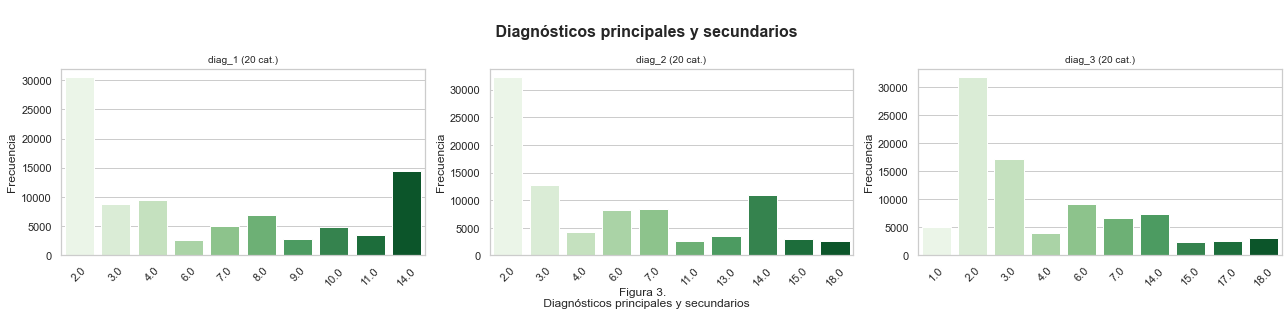

In [ ]:
graficar_cat(n_cols_diag_princ, cat_diag_princ, figura_num=3,
             titulo_general='\n Diagn√≥sticos principales y secundarios',
             palette='Greens')

Esta figura muestra la distribuci√≥n de los diagn√≥sticos principales (`diag_1`) y secundarios (`diag_2`, `diag_3`) registrados para cada paciente. Las categor√≠as representan grupos de enfermedades, basados en los c√≥digos ICD-9 agrupados por rangos.

- **Diagn√≥stico principal (`diag_1`)**:  
  La categor√≠a m√°s frecuente es la **2.0**, relacionada con enfermedades del sistema circulatorio. Le sigue la categor√≠a **14.0**, que representa los diagn√≥sticos de diabetes (por ejemplo, c√≥digos 250.xx). Esta combinaci√≥n muestra que muchos pacientes ingresan al hospital con complicaciones card√≠acas o directamente por complicaciones derivadas de la diabetes.

- **Segundo diagn√≥stico (`diag_2`)**:  
  De nuevo, la categor√≠a **2.0** sobresale por mucho, indicando que muchas personas presentan enfermedades cardiovasculares como condici√≥n secundaria. Le siguen las categor√≠as **3.0** (enfermedades del sistema respiratorio) y **14.0** (diabetes), con frecuencias similares. Esto refleja que, en pacientes con m√∫ltiples condiciones, es muy com√∫n ver esta combinaci√≥n de enfermedades circulatorias, respiratorias y metab√≥licas.

- **Tercer diagn√≥stico (`diag_3`)**:  
  En este caso, la categor√≠a **2.0** contin√∫a siendo la m√°s com√∫n, y la **3.0** le sigue con una frecuencia notable ‚Äîun poco m√°s de la mitad de la que tiene la categor√≠a 2.0. Esta tendencia refuerza la idea de que las enfermedades del coraz√≥n y pulm√≥n son condiciones cr√≥nicas recurrentes en pacientes hospitalizados, muchas veces en conjunto con la diabetes.

##### **2.2.2.4 Distribuci√≥n de Resultados de Laboratorio**

C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2211837392.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=orden, ax=ax, palette=palette)
C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2211837392.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=orden, ax=ax, palette=palette)


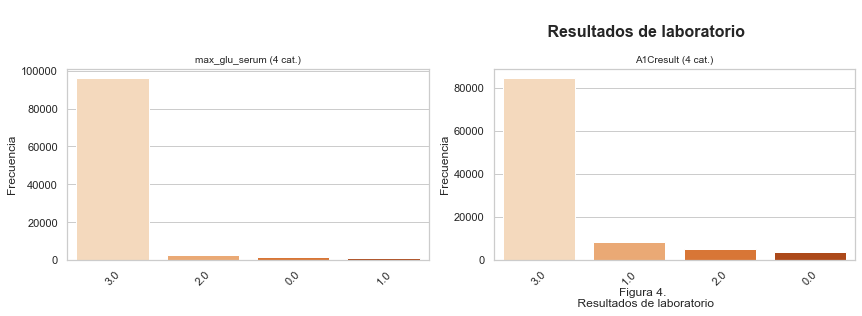

In [ ]:
graficar_cat(n_cols_resultados_lab, cat_resultados_lab, figura_num=4,
             titulo_general='\n Resultados de laboratorio',
             palette='Oranges')


Esta figura muestra la distribuci√≥n de dos variables relacionadas con ex√°menes cl√≠nicos importantes en el control de la diabetes: `max_glu_serum` (nivel m√°ximo de glucosa en suero) y `A1Cresult` (resultado del examen de hemoglobina glicosilada).

- **Nivel m√°ximo de glucosa en suero (`max_glu_serum`)**:  
  La mayor√≠a de los registros se encuentran en la categor√≠a **3.0**, que corresponde a **"No se realiz√≥ el test"**. Esto indica que para la gran mayor√≠a de pacientes no se midi√≥ el valor m√°ximo de glucosa durante su estancia hospitalaria. Las dem√°s categor√≠as (0.0, 1.0, 2.0) tienen frecuencias muy bajas, lo que sugiere que cuando s√≠ se hace la prueba, es en muy pocos casos.

- **Resultado del examen A1C (`A1Cresult`)**:  
  Al igual que en la variable anterior, la categor√≠a m√°s frecuente es la **3.0**, lo que tambi√©n significa que **no se realiz√≥ el test de hemoglobina glicosilada**. Las otras tres categor√≠as (0.0: "normal", 1.0: ">7", 2.0: ">8") est√°n presentes pero con frecuencias mucho menores. Esto puede implicar que el seguimiento a largo plazo del control gluc√©mico no se hace de manera sistem√°tica en los pacientes hospitalizados.


##### **2.2.2.5. Distribuci√≥n de Medicamentos Administrados Durante la Estancia**

C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2211837392.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=orden, ax=ax, palette=palette)
C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2211837392.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=orden, ax=ax, palette=palette)
C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2211837392.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=orden, ax=ax, palette=palette)
C:\Users\Janus\AppData\Local\Temp/ipyker

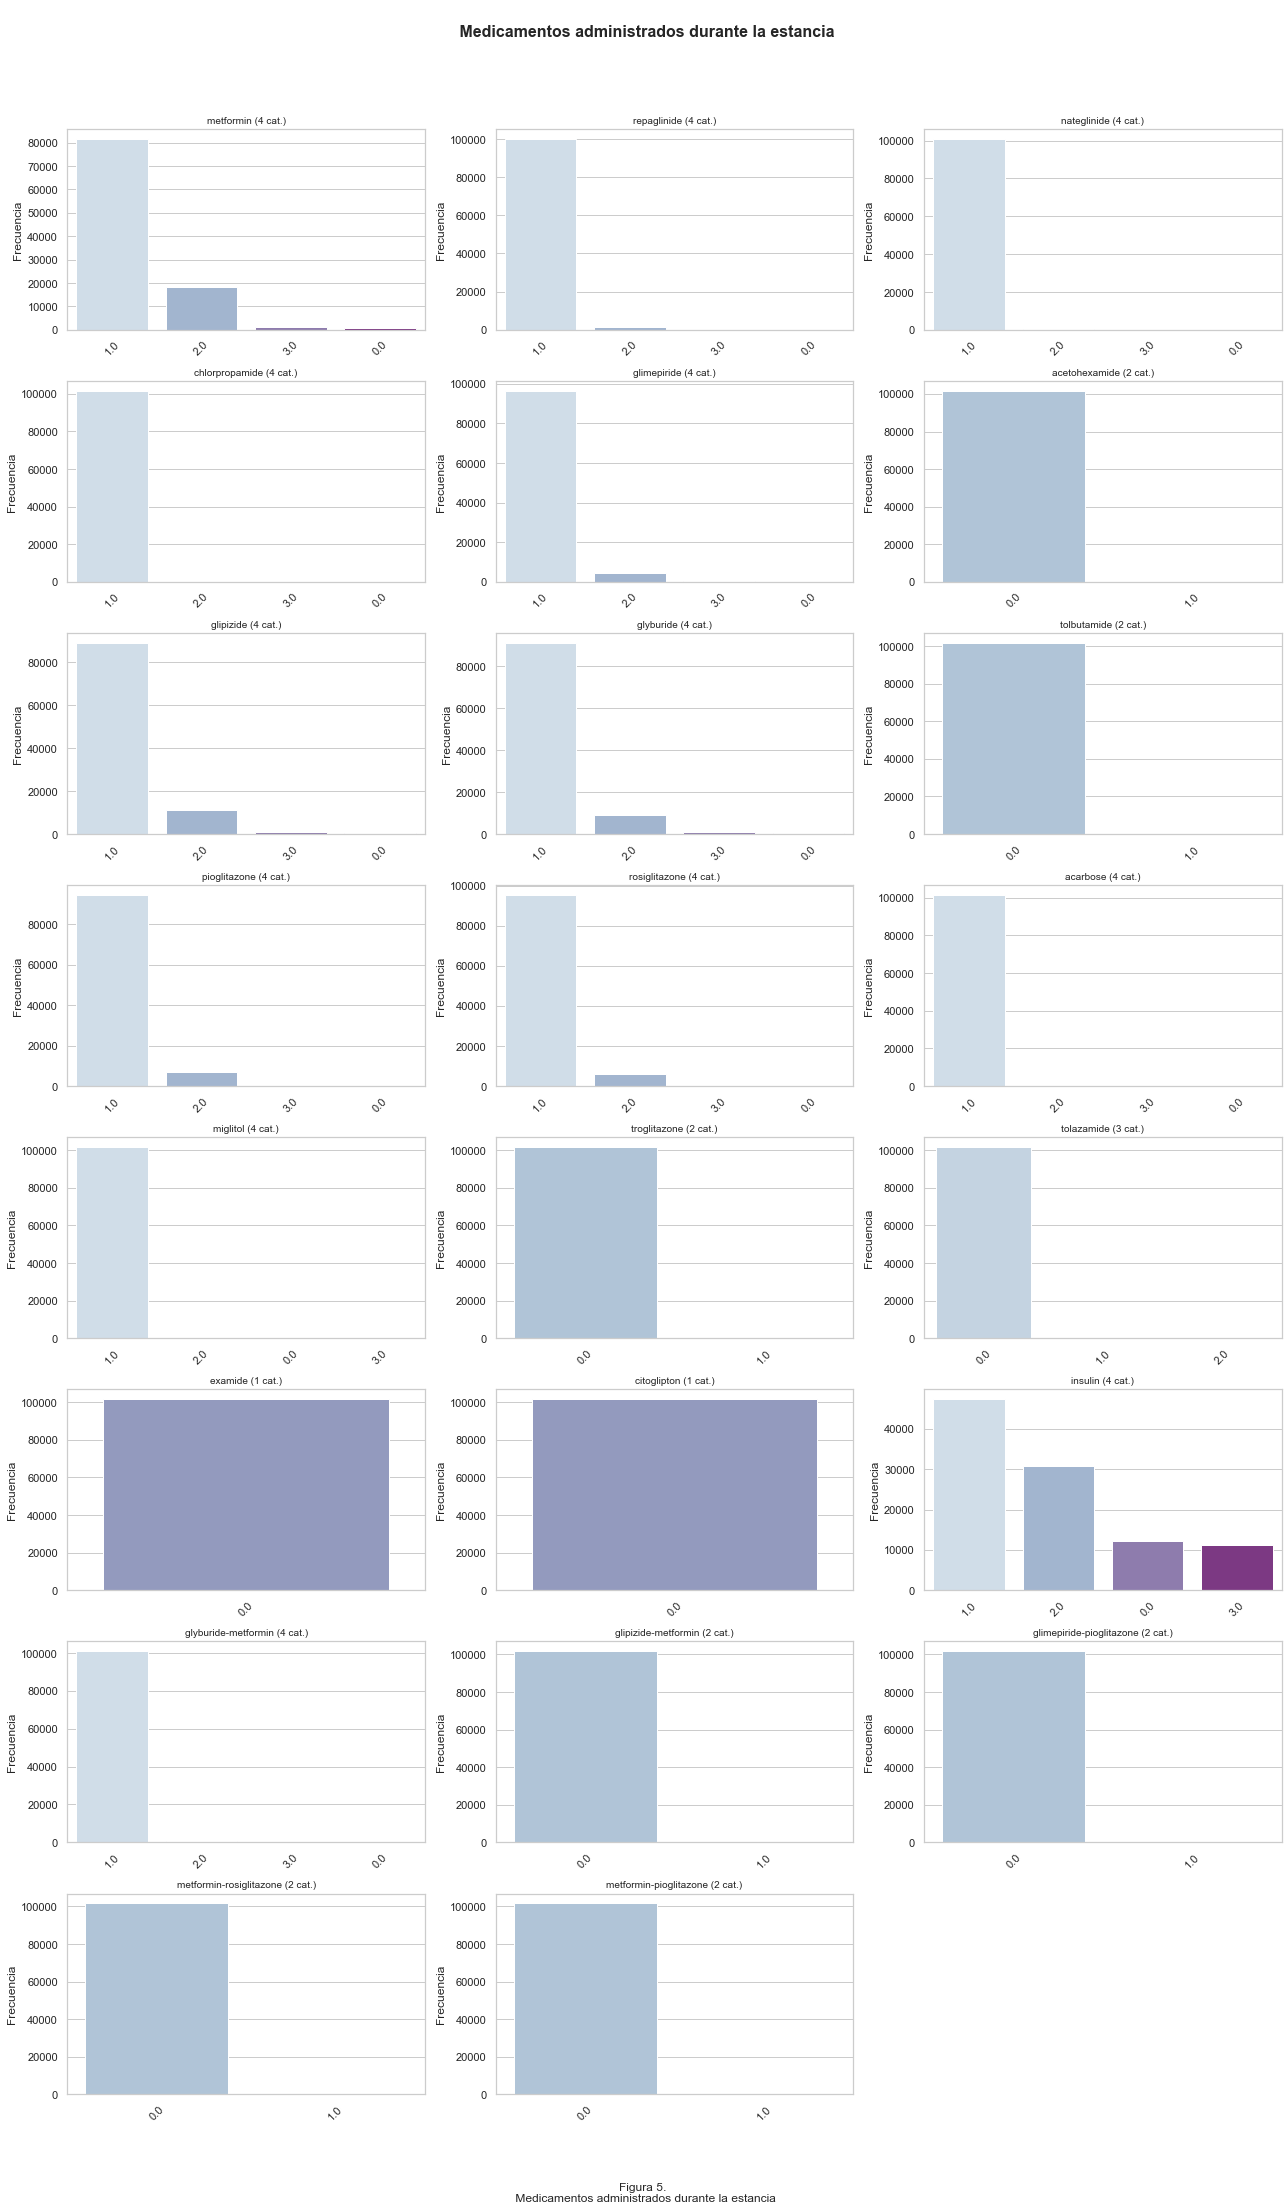

In [ ]:
graficar_cat(n_cols_meds, cat_meds, figura_num=5,
             titulo_general='\n Medicamentos administrados durante la estancia',
             palette='BuPu')

Esta figura presenta la distribuci√≥n de diferentes medicamentos utilizados en pacientes hospitalizados con diagn√≥stico de diabetes. 

- En general, la mayor√≠a de los medicamentos individuales (como `metformin`, `glimepiride`, `glyburide`, `pioglitazone`, entre otros) tienen como categor√≠a m√°s com√∫n el valor **1.0**, lo que indica que **la medicaci√≥n no cambi√≥ durante la estancia**. Es decir, los pacientes que ya estaban tomando estos medicamentos continuaron con ellos.

- Las categor√≠as **2.0** (medicaci√≥n a√±adida) y **3.0** (medicaci√≥n discontinuada) aparecen con menor frecuencia. En la mayor√≠a de los casos, la categor√≠a **0.0** (medicaci√≥n nunca utilizada) tiene una baja frecuencia, **excepto en medicamentos poco comunes**, como `acetohexamide`, `tolazamide` o combinaciones poco frecuentes.

- En los **medicamentos combinados** (como `glyburide-metformin`, `glipizide-metformin`, `metformin-pioglitazone`), se observa que la mayor√≠a de los pacientes **no recibieron estas combinaciones durante la hospitalizaci√≥n**. Esto puede deberse a que estas terapias son m√°s comunes en tratamientos ambulatorios que en contextos agudos.

- Una excepci√≥n interesante es la **insulina**, donde las frecuencias est√°n distribuidas entre todas las categor√≠as. Esto indica que **s√≠ hubo ajustes importantes en su administraci√≥n**, probablemente en respuesta a las necesidades cl√≠nicas inmediatas de los pacientes hospitalizados.


##### **2.2.2.6 Distribuci√≥n Control del Tratamiento Para la Diabetes**

C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2211837392.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=orden, ax=ax, palette=palette)
C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2211837392.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=orden, ax=ax, palette=palette)


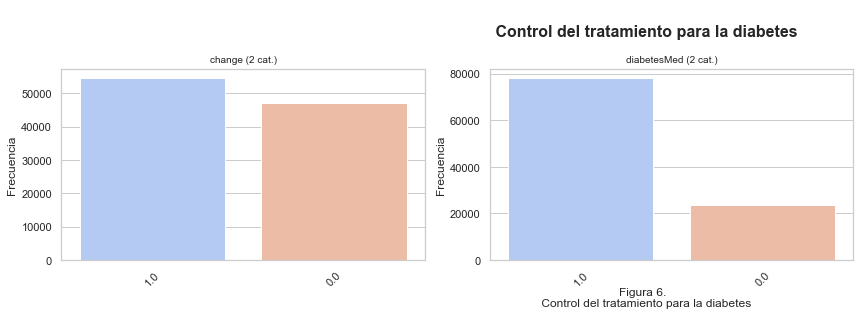

In [ ]:
graficar_cat(n_cols_control_tratamiento, cat_control_tratamiento, figura_num=6,
             titulo_general='\n Control del tratamiento para la diabetes',
             palette='coolwarm')



Esta figura presenta la distribuci√≥n de dos variables relacionadas con el control del tratamiento de pacientes hospitalizados con diagn√≥stico de diabetes.

- En el gr√°fico izquierdo, correspondiente a la variable `change`, se observa que la mayor√≠a de los pacientes presentan un valor de **1.0**, lo que indica que **hubo un cambio en la medicaci√≥n durante la hospitalizaci√≥n**. Este comportamiento sugiere que, en muchos casos, el tratamiento fue ajustado, probablemente en respuesta a evaluaciones m√©dicas o complicaciones agudas. No obstante, una cantidad considerable de pacientes tambi√©n se mantuvo con su tratamiento sin cambios (`0.0`), lo que podr√≠a reflejar condiciones estables o seguimiento de un protocolo ya establecido.

- En el gr√°fico derecho, correspondiente a la variable `diabetesMed`, se destaca que la mayor√≠a de los pacientes tienen un valor de **1.0**, lo que significa que **recibieron medicaci√≥n para la diabetes durante su estancia hospitalaria**. En contraste, una proporci√≥n menor de pacientes (`0.0`) no recibi√≥ medicaci√≥n, lo cual puede deberse a m√∫ltiples factores, como estad√≠as cortas, control diet√©tico, o decisiones cl√≠nicas espec√≠ficas. La predominancia del uso de medicamentos refleja la importancia del tratamiento farmacol√≥gico en el manejo hospitalario de la diabetes.

Ambas variables reflejan la din√°mica del tratamiento m√©dico en contextos hospitalarios, evidenciando tanto la alta tasa de intervenci√≥n como la adaptaci√≥n del manejo cl√≠nico seg√∫n las condiciones del paciente.

##### **2.2.2.7. Distribuci√≥n de la variable objetivo (readmisi√≥n)**

C:\Users\Janus\AppData\Local\Temp/ipykernel_18804/2211837392.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=orden, ax=ax, palette=palette)


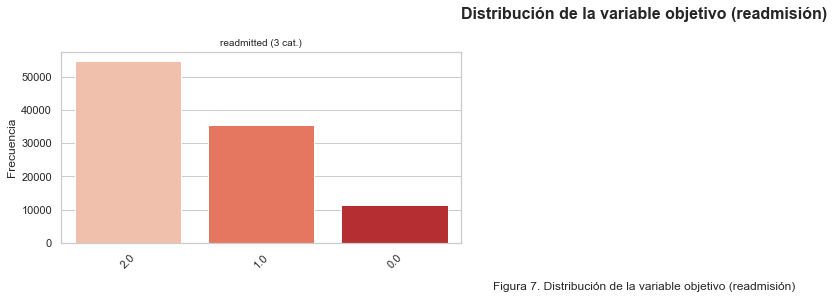

In [ ]:
graficar_cat(n_cols_objetivo, cat_objetivo, figura_num=7,
             titulo_general='Distribuci√≥n de la variable objetivo (readmisi√≥n)',
             palette='Reds')

El gr√°fico revela que la mayor√≠a de los pacientes no fueron readmitidos (`2.0`), con una frecuencia superior a 50.000 casos. En segundo lugar se encuentran los pacientes que s√≠ fueron readmitidos, pero despu√©s de 30 d√≠as (`1.0`), y finalmente, con una frecuencia mucho menor, los pacientes que fueron readmitidos antes de 30 d√≠as (`0.0`).

### **2.3 Variables Cruzadas**

#### **2.3.1. Variables Num√©ricas** 

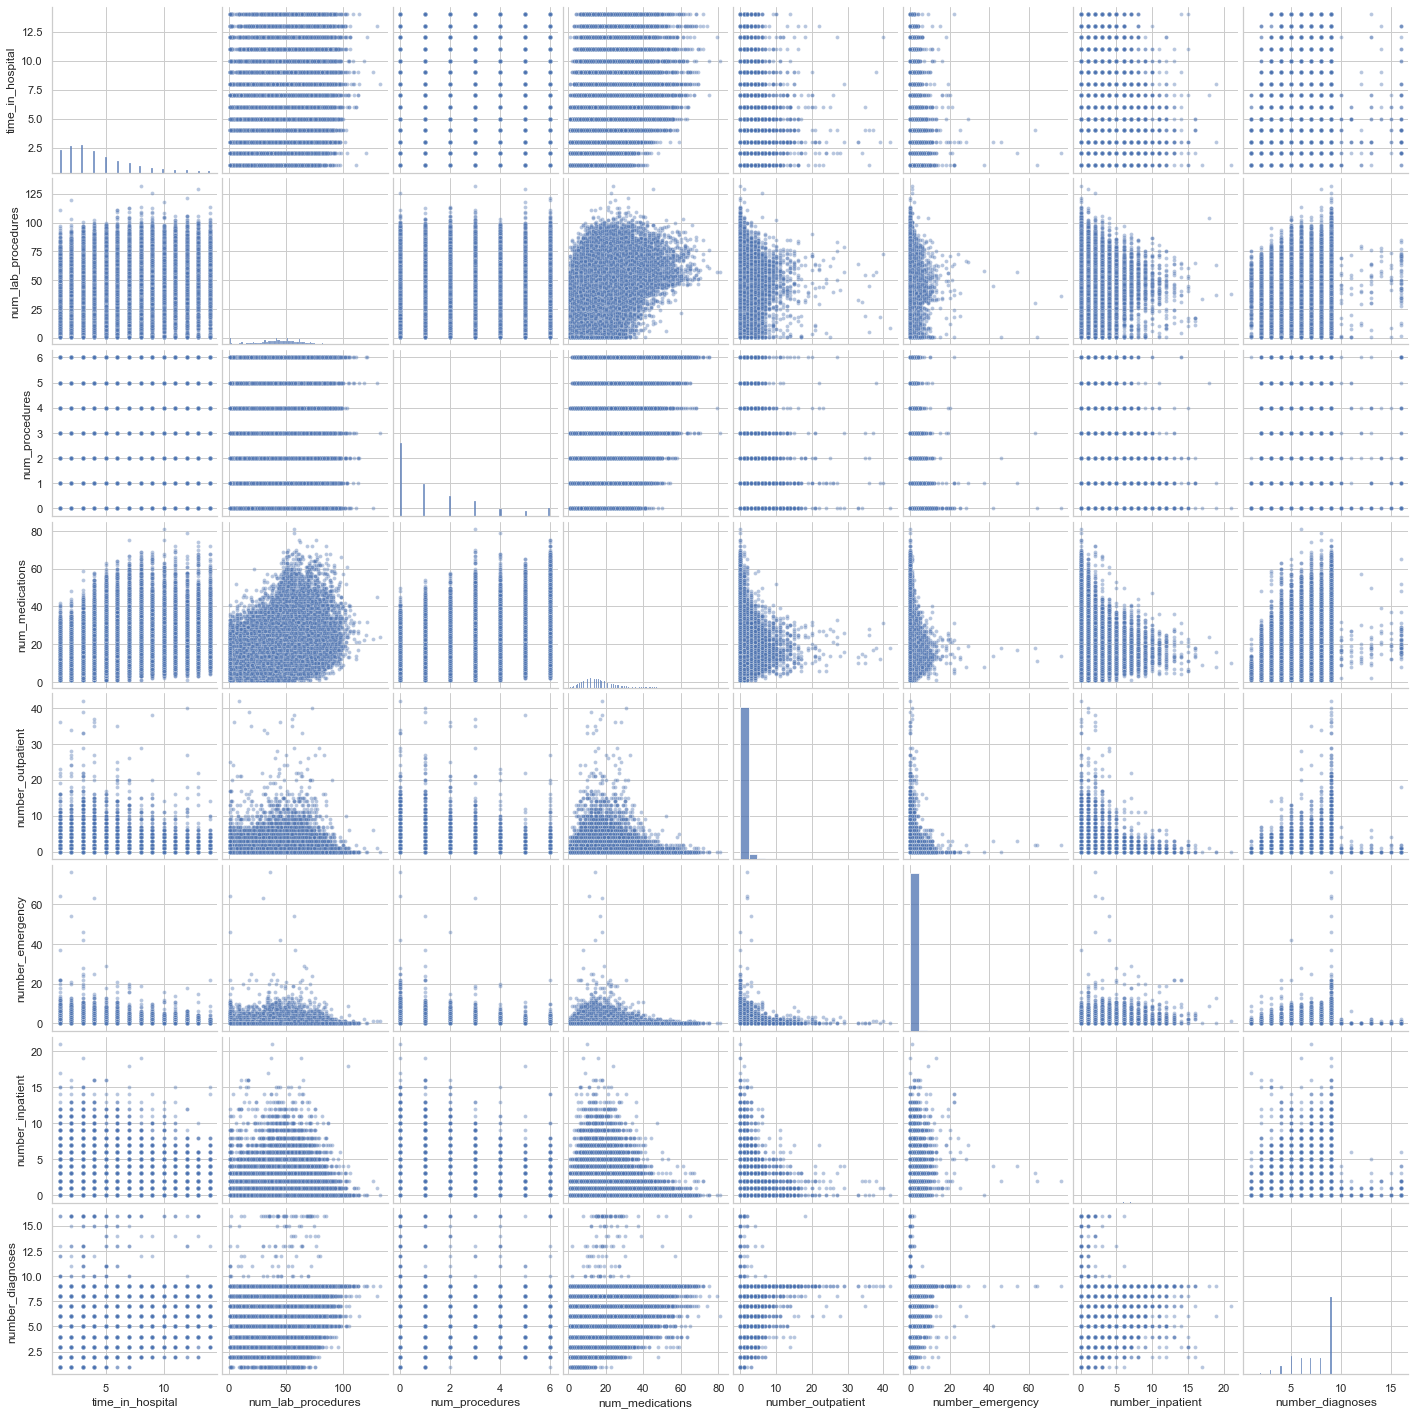

In [ ]:
cols_interes = ["time_in_hospital","num_lab_procedures","num_procedures", "num_medications",
"number_outpatient","number_emergency","number_inpatient","number_diagnoses"]
sns.pairplot(df[cols_interes], plot_kws={'alpha':0.4, 's':15})

Como an√°lisis general, en la matriz de dispersi√≥n no se aprecian relaciones lineales claras o fuertes entre la mayor√≠a de las variables num√©ricas, lo que coincide con lo observado en la matriz de correlaci√≥n, donde no se identificaron valores de ùëü^2 elevados. En su lugar, predominan correlaciones d√©biles o negativas, lo que sugiere que estas variables, de forma individual, podr√≠an tener una capacidad limitada para explicar la variabilidad de otras dentro del conjunto de datos.

#### **2.3.2. Variables Categ√≥ricas**

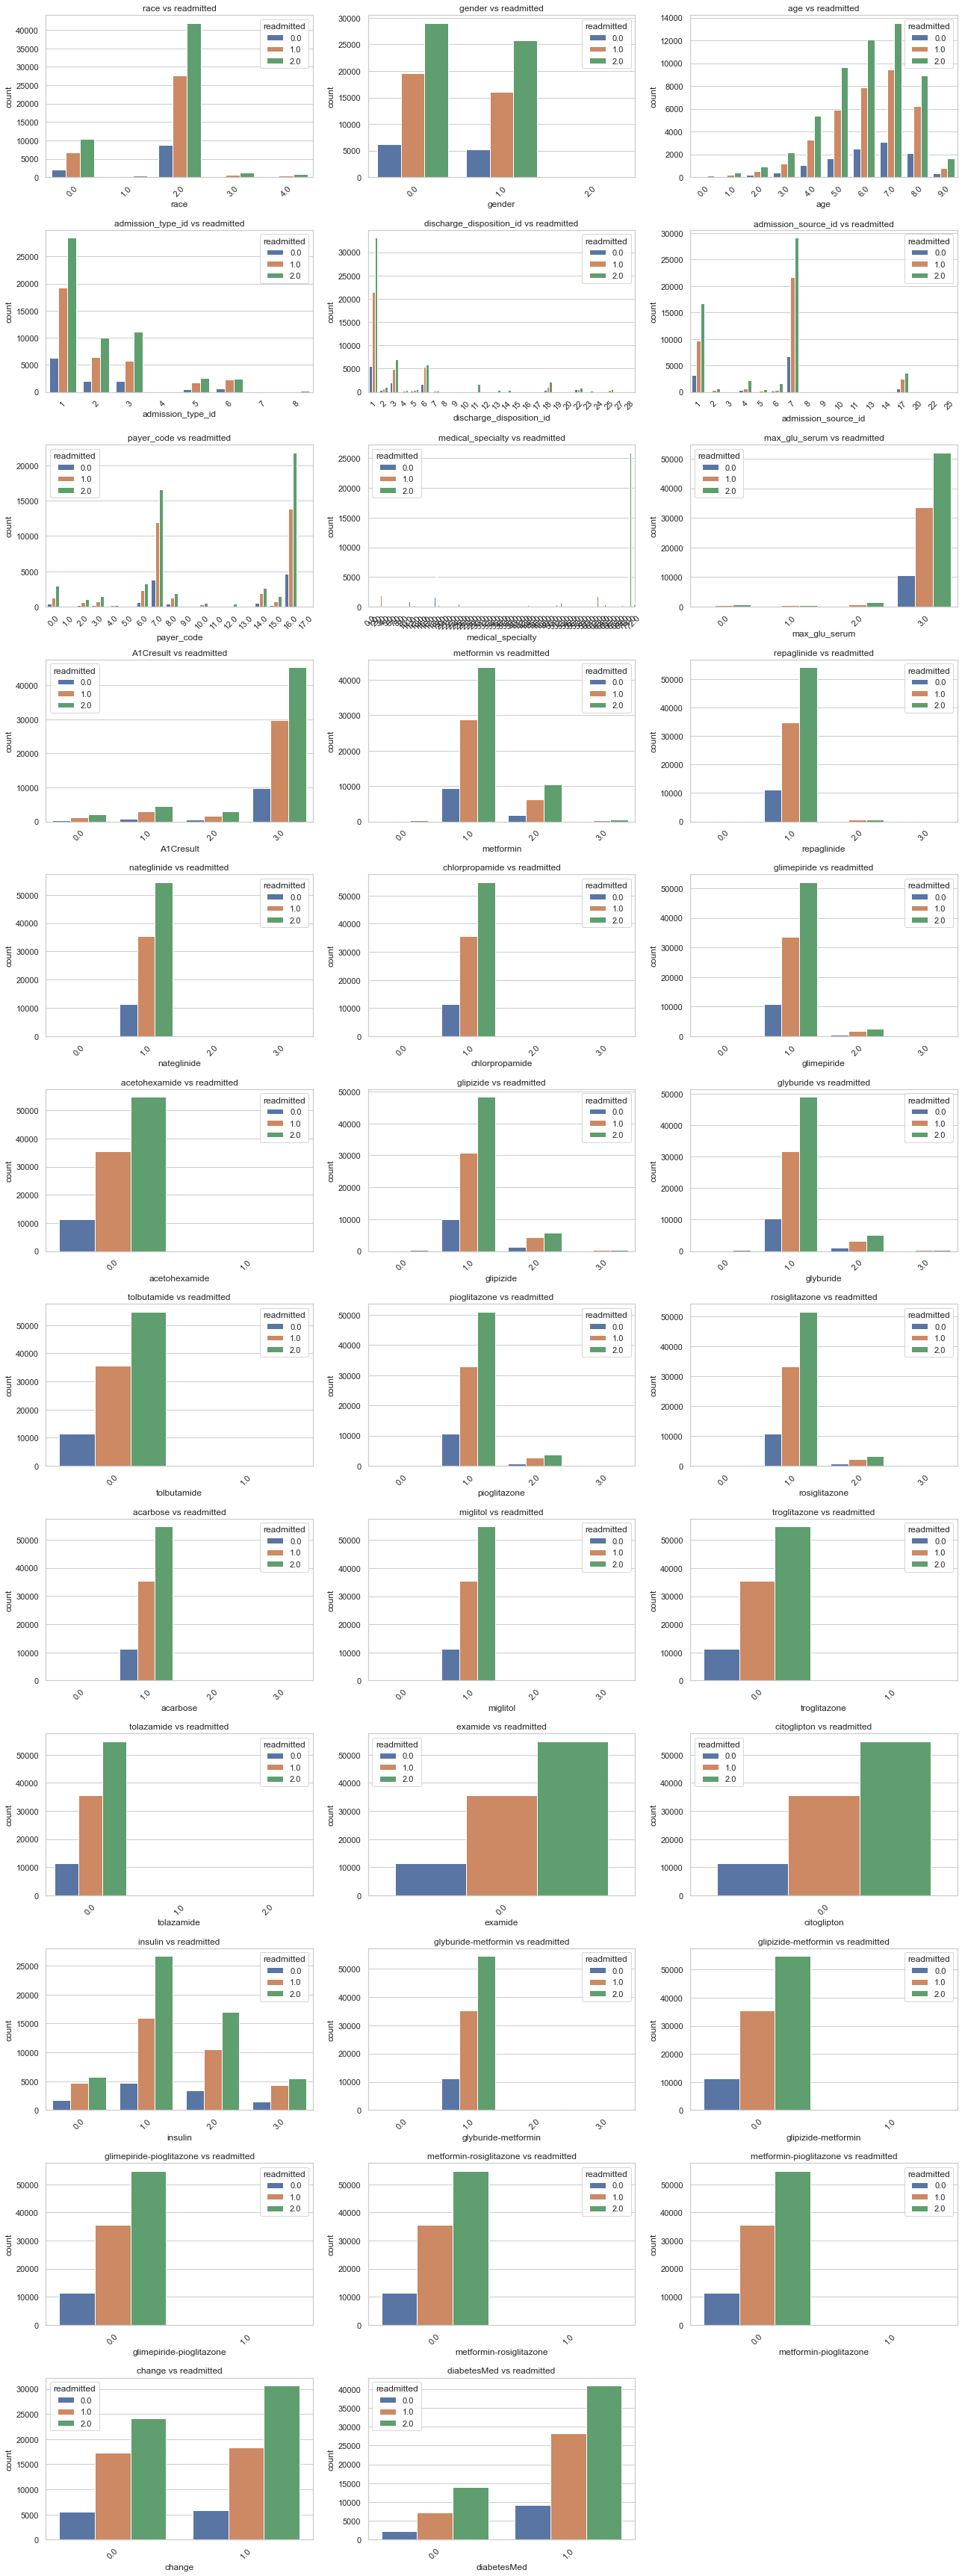

In [ ]:
# Variables categ√≥ricas (excepto 'readmitted')
categorical_vars = df.select_dtypes(include=['object','category']).columns.drop('readmitted')

# Definir tama√±o de la cuadr√≠cula
n_cols = 3  # n√∫mero de gr√°ficos por fila
n_rows = math.ceil(len(categorical_vars) / n_cols)  # filas necesarias

# Crear la figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()  # para iterar f√°cilmente

# Graficar cada variable en un subplot
for i, col in enumerate(categorical_vars):
    sns.countplot(x=col, hue='readmitted', data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs readmitted")
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vac√≠os si sobran
for j in range(i+1, len(axes)): 
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


De forma general, en estas gr√°ficas se observa que, para la mayor√≠a de las variables categ√≥ricas, una gran proporci√≥n de los pacientes corresponde a aquellos que no han sido readmitidos en el hospital. Este patr√≥n se repite de manera consistente, independientemente de la variable analizada, lo que sugiere que la clase de no readmisi√≥n es predominante en el conjunto de datos. Si bien algunas variables como race, gender o age muestran una distribuci√≥n m√°s equilibrada entre sus categor√≠as internas, la tendencia general sigue favoreciendo a los pacientes sin readmisi√≥n.

En conjunto, no se identifican patrones categ√≥ricos evidentes que permitan diferenciar de forma clara a los pacientes seg√∫n su estado de readmisi√≥n √∫nicamente a partir de estas variables. Sin embargo, se detecta que ciertas variables con un mayor n√∫mero de categor√≠as ‚Äîcomo medical_specialty o payer_code‚Äî podr√≠an contener informaci√≥n √∫til si se agrupan o transforman para reducir la dispersi√≥n y aumentar su representatividad. Asimismo, variables relacionadas con tratamientos o medicaci√≥n, aunque concentradas en pocas categor√≠as, podr√≠an aportar valor predictivo al combinarse con otras variables en un modelo multivariado, ya que podr√≠an reflejar pr√°cticas cl√≠nicas o perfiles de pacientes asociados con un mayor riesgo de readmisi√≥n.